In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
model=tf.keras.models.load_model('/Users/withmocha/Desktop/VisualStudioCode/Capstone Design project/sentence base/model/saved model/CNNBILSTM.h5')

2024-04-07 20:21:45.778428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-07 20:21:45.779324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-07 20:21:45.780023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 382, 64)           256       
                                                                 
 batch_normalization_4 (Batc  (None, 382, 64)          256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 191, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 189, 128)          24704     
                                                                 
 batch_normalization_5 (Batc  (None, 189, 128)         512       
 hNormalization)                                                 
                                                        

In [4]:
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/sentenceTransformer_vetorized.csv")
data_row.drop(columns=['Unnamed: 0'],inplace=True)
data_row.drop(columns=['predict'],inplace=True)
x_train=pd.DataFrame(data_row)

In [5]:
import pandas as pd

x_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/x_test.csv")
y_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/y_test.csv")

x_test.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
y_test

,predict
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test set에는 transform만 사용하기

In [8]:
x_test.shape

(500, 384)

In [9]:
x_test = tf.cast(x_test, tf.float32)

In [10]:
x_test = tf.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [11]:
x_test

<tf.Tensor: shape=(500, 384, 1), dtype=float32, numpy=
array([[[0.6892319 ],
        [0.36294976],
        [0.6079691 ],
        ...,
        [0.38962364],
        [0.5902495 ],
        [0.57835597]],

       [[0.66638005],
        [0.44281447],
        [0.499844  ],
        ...,
        [0.47871447],
        [0.33750746],
        [0.56224054]],

       [[0.5303241 ],
        [0.46591383],
        [0.70120794],
        ...,
        [0.5112138 ],
        [0.4920013 ],
        [0.5667965 ]],

       ...,

       [[0.61993676],
        [0.39750797],
        [0.5751135 ],
        ...,
        [0.4552074 ],
        [0.45842278],
        [0.4654789 ]],

       [[0.49388215],
        [0.46675885],
        [0.59619236],
        ...,
        [0.5064777 ],
        [0.52672225],
        [0.49897832]],

       [[0.6443358 ],
        [0.3458393 ],
        [0.633872  ],
        ...,
        [0.59749067],
        [0.35411078],
        [0.56914645]]], dtype=float32)>

In [12]:
pred = model.predict(x_test)

2024-04-07 20:23:01.754713: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-07 20:23:01.929728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-07 20:23:01.932425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-07 20:23:01.933059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

16/16 [==============================] - 1s 26ms/step


In [13]:
pred

array([[3.46467715e-07],
       [1.89292507e-06],
       [4.30481322e-07],
       [8.92203207e-06],
       [7.28477119e-07],
       [4.21757875e-07],
       [7.45863360e-07],
       [1.05258619e-06],
       [4.06027112e-07],
       [8.70031329e-07],
       [8.77866682e-07],
       [3.77299187e-07],
       [1.58507169e-06],
       [4.79397443e-07],
       [3.90600871e-06],
       [3.92614680e-07],
       [4.48179037e-07],
       [4.42899335e-07],
       [2.64596252e-07],
       [1.14993156e-06],
       [3.62518250e-07],
       [1.02021215e-06],
       [1.37939389e-06],
       [5.88700118e-07],
       [2.94817795e-07],
       [3.89840665e-07],
       [6.42542375e-07],
       [3.51279652e-07],
       [4.54205178e-07],
       [1.14491650e-06],
       [5.30930265e-06],
       [6.10875873e-07],
       [3.75666986e-07],
       [5.37901997e-07],
       [7.96842983e-07],
       [6.94235321e-04],
       [1.65988661e-06],
       [1.49853770e-06],
       [8.52006451e-07],
       [1.57301270e-06],


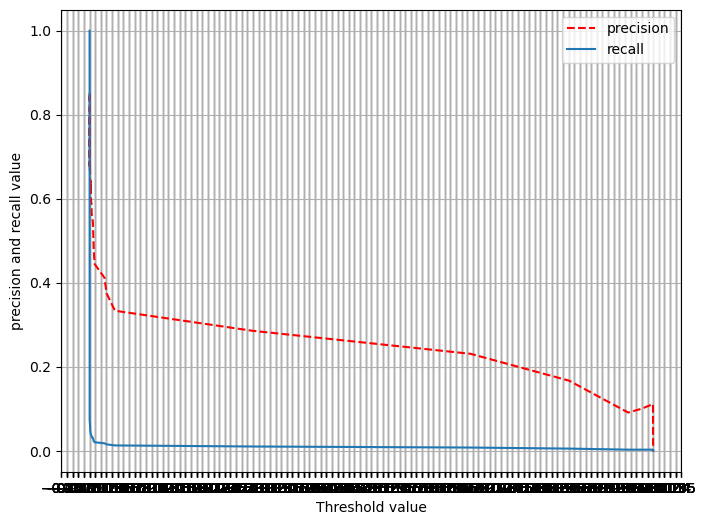

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_curve_plot(y_test,pred):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred)
    
    plt.figure(figsize=(8,6))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.001),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred)

In [16]:
precisions, recalls,thresholds = precision_recall_curve(y_test,pred)

max=precisions[0]
num=0
for i in range(len(thresholds)):
    if max<precisions[i]:
        num=i
        max=precisions[i]
thresholds_fit=thresholds[num]

In [17]:
y_pred=pred.reshape(-1)
y_pred

array([3.46467715e-07, 1.89292507e-06, 4.30481322e-07, 8.92203207e-06,
       7.28477119e-07, 4.21757875e-07, 7.45863360e-07, 1.05258619e-06,
       4.06027112e-07, 8.70031329e-07, 8.77866682e-07, 3.77299187e-07,
       1.58507169e-06, 4.79397443e-07, 3.90600871e-06, 3.92614680e-07,
       4.48179037e-07, 4.42899335e-07, 2.64596252e-07, 1.14993156e-06,
       3.62518250e-07, 1.02021215e-06, 1.37939389e-06, 5.88700118e-07,
       2.94817795e-07, 3.89840665e-07, 6.42542375e-07, 3.51279652e-07,
       4.54205178e-07, 1.14491650e-06, 5.30930265e-06, 6.10875873e-07,
       3.75666986e-07, 5.37901997e-07, 7.96842983e-07, 6.94235321e-04,
       1.65988661e-06, 1.49853770e-06, 8.52006451e-07, 1.57301270e-06,
       6.11614860e-06, 5.01104432e-06, 2.14129250e-05, 2.80835889e-06,
       1.90265946e-05, 3.01080439e-02, 8.72775388e-07, 4.04419006e-06,
       3.61277841e-07, 6.50246022e-07, 6.00110297e-07, 3.21810177e-07,
       3.53700358e-07, 8.64128026e-07, 2.04314756e-06, 3.98161319e-07,
      

In [18]:
y_pred=pred.reshape(-1)
threshold = thresholds_fit
pred = (y_pred >= threshold)

In [19]:
pred

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False, False,

In [20]:
import numpy as np

y_test=np.array(y_test['predict'])


In [21]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
from sklearn.metrics import accuracy_score

accuracy_test= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.55
